# Final Project 2: Exploratory Data Analysis on University Rankings

This case study consists of 3 parts: 


A. Data understanding and exploration
- Student to decide how to explore, inspect and cleanse the data 

B. Questions: 6 in total
- Answer the questions and derive the requested outputs with necessary explanations and inferences 

C. Open-ended Question 
- Student to decide the scope and methods/packages to use to answer the question and derive insights

The data reflects four years of ranking, 2012, 2013, 2014, 2015; 2012 and 2013 consists of the top 100 universities while 2014, and 2015 are the top 1000 universities. The data could be assessed on a yearly basis to uncover trends. 

The data was collected by The Center for World University Rankings. Sampling was weighted based on the following criteria: research output, (10%), high-quality publication, (10%), influence, (10%), citations, (10%), quality of faculty, (10%), alumni employment, (25%), quality of education, (25%). The totals of the above criteria is then used te create an aggregation and scoring. 

Data dictionary:
- World_rank - World rank for the university.
- Institution - Name of the university.
- Country - Country of each university.
- National_Rank - Rank of university within its country.
- Quality_of_education - Rank for quality of education; measured by the number of a university's alumni who have garnered major international accolades, i.e. Pulitzer, Nobel Prize.
- Alumni_employment - Rank for alumni employment; measured by the number of a university's alumni who have held CEO positions at multinational companies in relation to the university's size.
- Quality_of_faculty - Rank for quality of faculty; measured by the number of faculty who have won major international awards.
- Publications - Rank for publications.
- Influence - Rank for influence.
- Citations - Rank for citations.
- Broad_impact - Rank for broad impact (only available for 2014 and 2015).
- Patents - Rank for patents.
- Score - Total score, used for determining world rank.
- Year - Years of ranking (2012 to 2015).

# A. Data Understanding and exploration

### Read the cwur.Data.csv file and inspect the data, understand the data (what are the components, how it looks like, and some basic statistics about the variables). Take necessary steps to address any problems or issues with the data and fix them with appropriate measures.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import numpy as np
import plotly.offline as offline
import seaborn as sns

sns.set()
offline.init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
df = pd.read_csv("cwurData.csv")
df.head(10)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,NaN,26,82.34,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,NaN,66,79.14,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,NaN,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,NaN,16,78.55,2012


In [3]:
df.count()

# Broad impact has 200 missing values.

world_rank              2200
institution             2200
country                 2200
national_rank           2200
quality_of_education    2200
alumni_employment       2200
quality_of_faculty      2200
publications            2200
influence               2200
citations               2200
broad_impact            2000
patents                 2200
score                   2200
year                    2200
dtype: int64

In [4]:
dup = df.duplicated()
dup

dupcheck = dup.filter("True")
dupcheck

#There are no duplicates in this dataframe.

Series([], dtype: bool)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [6]:
df.broad_impact.isna().sum()

200

### Comments:
There seems to be missing values under broad_impact. However, this seems to be less of an error and more of how there is no information available as it is a new metric introduced in 2014. Therefore, values are not present in years 2012 and 2013.

In [7]:
# Some basic stats. There are more than 100 rows/entries for 2 years: 2014, 2015. 

df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


# B. Questions
### Answer the questions below based on the dataset. 

### 1. Focusing only on rows with world_rank smaller and inclusive of 100: Which country (throughout all years) has the most number universities within top 100 of world_rank? Let's call count of universities within top100 as 'count_100'. What are the top 10 countries by value of count_100, and what is count_100 for each of these countries?

In [8]:
pd.set_option('display.max_rows', None)  #I'm a little OCD, prefer to view ALL entries for easy reference. 

# Extracting the information required:

count_100 = pd.DataFrame(df.loc[df['world_rank'] <= 100, 'country'].value_counts().head(10)) 

#Dataframe formatting:

count_100.rename(columns={"country": "Count"}, inplace = True)
count_100.index.name = 'Country'
count_100

,Count
Country,
USA,223
United Kingdom,29
Japan,26
France,18
Switzerland,16
Israel,14
Canada,13
Germany,11
Australia,8


### Comments:

USA has the most number of universities ranked top 100 in the world throughout the years 2012-2015. 

### 2. For the top 10 countries with largest amount of top100 universities, What is the percentage composition of each countries' count_100 out of the 10 countries? (ie. the 10 countries make up 100%) 

In [9]:
# Obtaining total number of universities in the Top 10 countries

total_count = count_100['Count'].sum()
total_count

364

In [10]:
# Calculating percentage composition 

count_100["Percentage"] = (count_100["Count"] / total_count) *100

# Formatting dataframe: 

count_100.reset_index(inplace = True)
count_100

,Country,Count,Percentage
0,USA,223,61.263736
1,United Kingdom,29,7.967033
2,Japan,26,7.142857
3,France,18,4.945055
4,Switzerland,16,4.395604
5,Israel,14,3.846154
6,Canada,13,3.571429
7,Germany,11,3.021978
8,Australia,8,2.197802
9,Netherlands,6,1.648352


### 3. Plot a graph showing the top 5 countries from Q2 and their counts

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


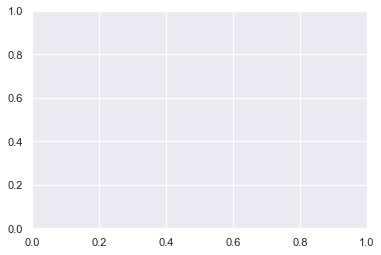

In [11]:
# Setting the canvas for the plot. 
fig, ax = plt.subplots()
top_5 = count_100.head(5)

print(plt.style.available)
plt.style.use("fivethirtyeight")

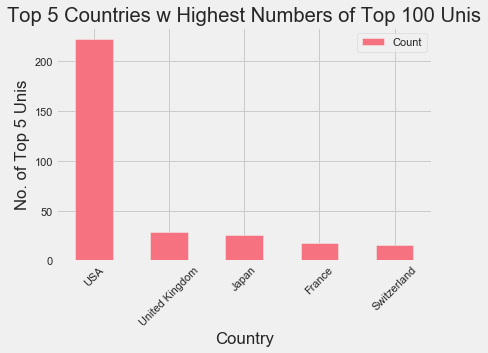

In [12]:
# Plotting the graph

ax = top_5.plot(x = "Country", y = "Count", kind = "bar", color = '#F67280')
ax.set(title = "Top 5 Countries w Highest Numbers of Top 100 Unis", xlabel="Country", ylabel ="No. of Top 5 Unis")

# Formatting the ticks

plt.xticks(rotation=45);

### Comments:

The majority of Top 100 Universities come from USA, who has about 8x more top 100 universities than the next best country: the UK.

The difference between the number of top 100 universities between the UK, Japan, France, and Switzerland is less drastic compared to the disparity between USA and UK.

With only integers, it's difficult to see if USA is the best place to go for a quality education because we should be using a percentage figure of: (Number of world_rank Top 100 schools / Total Universities in country) *100 to get a more accurate representation. 

### 4. Groupby year and country showing the count of universities with world_rank within top 100 for that country and year. Set the name for column of counts as 'count_top100'. Sort the year in ascending order while count_top100 in descending order. See the table below as example output.

In [13]:
# Creating a copy of the main dataframe to not manipulate the original 

df2 = df.copy()

# Filtering the data relevant needed (all universities ranked 100 and above in the world)

df2_top100 = df2[(df2.world_rank <= 100)]

In [14]:
# Getting the counts & information that we need through groupby

top100_grouped = pd.DataFrame(df2_top100.groupby(['year', 'country'])['world_rank'].nunique())

#Formatting the dataframe

top100_grouped.rename(columns={"world_rank": "count_top100"}, inplace = True)
top100_grouped.sort_values(['year', 'count_top100'], ascending = [True, False], inplace = True)
top100_grouped

count_top100
year country                     
2012 USA                       58
     United Kingdom             8
     France                     5
     Japan                      5
     Israel                     4
     Switzerland                4
     Canada                     3
     Germany                    3
     Australia                  2
     Netherlands                2
     Denmark                    1
     Finland                    1
     Italy                      1
     Norway                     1
     South Korea                1
     Sweden                     1
2013 USA                       57
     United Kingdom             7
     Japan                      6
     France                     5
     Canada                     4
     Israel                     4
     Switzerland                4
     Australia                  2
     Germany                    2
     Denmark                    1
     Finland                    1
     Italy                      1
     Netherlands                1
     Norway                     1
     Russia                     1
     Singapore                  1
     South Korea                1
     Sweden                     1
2014 USA                       53
     Japan                      8
     United Kingdom             7
     France                     4
     Germany                    4
     Switzerland                4
     Canada                     3
     Israel                     3
     Australia                  2
     China                      2
     Sweden                     2
     Belgium                    1
     Denmark                    1
     Italy                      1
     Netherlands                1
     Russia                     1
     Singapore                  1
     South Korea                1
     Taiwan                     1
2015 USA                       55
     Japan                      7
     United Kingdom             7
     France                     4
     Switzerland                4
     Canada                     3
     Israel                     3
     Australia                  2
     China                      2
     Germany                    2
     Netherlands                2
     South Korea                2
     Belgium                    1
     Denmark                    1
     Norway                     1
     Russia                     1
     Singapore                  1
     Sweden                     1
     Taiwan                     1

### Comments:

Interestingly, since 2012, more Asian countries (Singapore, Taiwan, China) have entered the Top 100 count, suggesting that there could be growing educational potential in some East Asian countries.

Not only that, there are also more universities within those countries that are entering the top 100 count. Japan saw an increase of universities from 5-7, reaching a peak of 8 unis in 2014, and has since displaced both France and the UK in 2015 since 2012, ranking as the 2nd country to have the highest number of universities in the top 100 count. 

### 5. Use an appropriate visual chart to display the trend for the count of top 100 universities for Japan, China and Singapore for years 2012 - 2015 in a single chart.

In [15]:
# Slicing the data needed from df2_top100 by country. 

chart = df2_top100[(df2_top100.country == "Japan") | (df2_top100.country == "China") | (df2_top100.country == "Singapore")]

# Groupby unique counts

df2_chart = pd.DataFrame(chart.groupby(['year', 'country'])['world_rank'].nunique())

# Format dataframe

df2_chart.reset_index(inplace = True)

# Sort dataframe accordingly.
df2_chart.sort_values(['year', 'world_rank'], ascending = [True, False], inplace = True)
df2_chart

,year,country,world_rank
0,2012,Japan,5
1,2013,Japan,6
2,2013,Singapore,1
4,2014,Japan,8
3,2014,China,2
5,2014,Singapore,1
7,2015,Japan,7
6,2015,China,2
8,2015,Singapore,1


In [16]:
# Prep datasets to set traces for Plotly

df_chartjp = df2_chart.loc[df2_chart['country'] == 'Japan', ['year', 'world_rank']]
df_chartcn = df2_chart.loc[df2_chart['country'] == 'China', ['year', 'world_rank']]
df_chartsg = df2_chart.loc[df2_chart['country'] == 'Singapore', ['year', 'world_rank']]

# Check Datasets

# df_chartjp

In [17]:
# df_chartcn

In [18]:
# df_chartsg

In [19]:
# Set traces for the individual countries over the years. 

trace1 = go.Scatter(x = df_chartjp.year,
                    y = df_chartjp.world_rank,
                    mode = "lines",
                    name = "Japan",
                    marker = dict(color="blue"),
                    text = df_chartjp.year)

trace2 = go.Scatter(x = df_chartcn.year,
                    y = df_chartcn.world_rank,
                    mode = "lines",
                    name = "China",
                    marker = dict(color="green"),
                    text = df_chartcn.year)

trace3 = go.Scatter(x = df_chartsg.year,
                    y = df_chartsg.world_rank,
                    mode = "lines",
                    name = "Singapore",
                    marker = dict(color="red"),
                    text = df_chartsg.year)

In [20]:
# Plot line chart

data = [trace1, trace2, trace3]

layout = dict(title = 'No. of Top 100 Unis for Japan, China and Singapore from 2012 - 2015',
              xaxis = dict(tickformat = ',d', title = 'Year'),
              yaxis = dict(title = 'World Rank'))

fig = dict(data=data, layout=layout)

offline.iplot(fig)
              

#Important to keep gaps because Singapore and China did not have a Top 100 Uni until 2013 and 2014 respectively. 

### Comments:

Singapore and China are relatively new players to the list, as compared to Japan, a more established country with more (5-8) universities in the top 100 list. 

Japan is doing very well from 2012-2015, increasing from 5-7 universities and peaking at 8.

While Singapore made the list earlier in 2013 with 1 university, interestingly, China started out with 2 universities, albeit a little later in 2014. Maybe due to them being a larger country with more universities.

### 6. For top 10 universities in 2015, what was the trend for world_rank for those universities across all the years? Which universities generally improved, and which ones declined in world_rank? Use an appropriate visual to show the trend and explain the results.

In [21]:
# Slice and obtain data needed.

top10_2015 = df2.loc[((df2['world_rank'] <= 100) & (df2['year'] == 2015))].head(10)
top10_2015

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
1200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015
1201,2,Stanford University,USA,2,9,2,4,5,3,3,4.0,10,98.66,2015
1202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,97.54,2015
1203,4,University of Cambridge,United Kingdom,1,2,10,5,11,6,12,13.0,48,96.81,2015
1204,5,University of Oxford,United Kingdom,2,7,13,10,7,12,7,9.0,15,96.46,2015
1205,6,Columbia University,USA,4,13,6,9,13,13,11,12.0,4,96.14,2015
1206,7,"University of California, Berkeley",USA,5,5,21,6,10,4,4,7.0,29,92.25,2015
1207,8,University of Chicago,USA,6,11,14,8,17,16,12,22.0,141,90.70,2015
1208,9,Princeton University,USA,7,4,15,3,72,25,24,33.0,225,89.42,2015
1209,10,Cornell University,USA,8,12,18,14,24,15,25,22.0,11,86.79,2015


In [22]:
#Get list of Top 10 Universities in 2015.

institutes = top10_2015.iloc[:,1]
institutes.reset_index(drop=True, inplace=True)
i_list = institutes.values.tolist()
i_list

['Harvard University',
 'Stanford University',
 'Massachusetts Institute of Technology',
 'University of Cambridge',
 'University of Oxford',
 'Columbia University',
 'University of California, Berkeley',
 'University of Chicago',
 'Princeton University',
 'Cornell University']

In [23]:
# To call all rows where the the Universities in i_list appear through the years. 

bool_results = df2.institution.isin(i_list)
filtered_df = df[bool_results]

# Call the below dataset for a full list of rows that include the universities in i_list (Hidden because of length)
# filtered_df

In [24]:
qn6_Harvard = filtered_df.loc[filtered_df['institution'] == 'Harvard University', ['year', 'world_rank']]
qn6_Stanford = filtered_df.loc[filtered_df['institution'] == 'Stanford University', ['year', 'world_rank']]
qn6_MIT = filtered_df.loc[filtered_df['institution'] == 'Massachusetts Institute of Technology', ['year', 'world_rank']]
qn6_Cambridge = filtered_df.loc[filtered_df['institution'] == 'University of Cambridge', ['year', 'world_rank']]
qn6_Oxford = filtered_df.loc[filtered_df['institution'] == 'University of Oxford', ['year', 'world_rank']]
qn6_Columbia = filtered_df.loc[filtered_df['institution'] == 'Columbia University', ['year', 'world_rank']]
qn6_Berkeley = filtered_df.loc[filtered_df['institution'] == 'University of California, Berkeley', ['year', 'world_rank']]
qn6_Chicago = filtered_df.loc[filtered_df['institution'] == 'University of Chicago', ['year', 'world_rank']]
qn6_Princeton = filtered_df.loc[filtered_df['institution'] == 'Princeton University', ['year', 'world_rank']]
qn6_Cornell = filtered_df.loc[filtered_df['institution'] == 'Cornell University', ['year', 'world_rank']]

In [25]:
# Prep datasets to set traces for Plotly

trace1 = go.Scatter(x = qn6_Harvard.year,
                    y = qn6_Harvard.world_rank,
                    mode = "lines",
                    name = "Harvard",
                    marker = dict(color="#000000"),
                    text = qn6_Harvard.year)

trace2 = go.Scatter(x = qn6_Stanford.year,
                    y = qn6_Stanford.world_rank,
                    mode = "lines",
                    name = "Stanford University",
                    marker = dict(color="#C0392B"),
                    text = qn6_Stanford.year)

trace3 = go.Scatter(x = qn6_MIT.year,
                    y = qn6_MIT.world_rank,
                    mode = "lines",
                    name = "Massachusetts Institute of Technology",
                    marker = dict(color="#0000CD"),
                    text = qn6_MIT.year)

trace4 = go.Scatter(x = qn6_Cambridge.year,
                    y = qn6_Cambridge.world_rank,
                    mode = "lines",
                    name = "University of Cambridge",
                    marker = dict(color="#76448A"),
                    text = qn6_Cambridge.year)

trace5 = go.Scatter(x = qn6_Oxford.year,
                    y = qn6_Oxford.world_rank,
                    mode = "lines",
                    name = "University of Oxford",
                    marker = dict(color="#3498DB"),
                    text = qn6_Oxford.year)

trace6 = go.Scatter(x = qn6_Columbia.year,
                    y = qn6_Columbia.world_rank,
                    mode = "lines",
                    name = "Columbia University",
                    marker = dict(color="#138D75"),
                    text = qn6_Columbia.year)

trace7 = go.Scatter(x = qn6_Berkeley.year,
                    y = qn6_Berkeley.world_rank,
                    mode = "lines",
                    name = "University of California, Berkeley",
                    marker = dict(color="#F4D03F"),
                    text = qn6_Berkeley.year)

trace8 = go.Scatter(x = qn6_Chicago.year,
                    y = qn6_Chicago.world_rank,
                    mode = "lines",
                    name = "University of Chicago",
                    marker = dict(color="#E67E22"),
                    text = qn6_Chicago.year)

trace9 = go.Scatter(x = qn6_Princeton.year,
                    y = qn6_Princeton.world_rank,
                    mode = "lines",
                    name = "Princeton University",
                    marker = dict(color="#873600"),
                    text = qn6_Princeton.year)

trace10 = go.Scatter(x = qn6_Cornell.year,
                    y = qn6_Cornell.world_rank,
                    mode = "lines",
                    name = "Cornell University",
                    marker = dict(color="#A569BD"),
                    text = qn6_Cornell.year)

In [26]:
# Plot line chart

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]

layout = dict(title = 'World Rank of Top 10 Unis in 2015 for Years 2012-2015',
              xaxis = dict(tickformat = ',d', title = 'Year'),
              yaxis = dict(title = 'World Rank'))

fig = dict(data=data, layout=layout)

# To make the chart show an increase in rank as an increase, instead of a decrease in rank as an increase. 
fig['layout']['yaxis']['autorange'] = "reversed"  

offline.iplot(fig)

### Comments:

8 Universities out of the top 10 are from the US. 

Harvard is the top and most constant university for 2012-2015, maintaining 1st place for all 4 years.

Except for MIT and Princeton, the rest enjoy a net increase in rankings from 2012-2015.

University of Chicago showed greatest net increase of 3 places, from 11th-8th place.

Princeton University showed the greatest net decrease of 3 places, from 6th-9th place.

Greatest increase in a year: University of Oxford of 4 places, from 7th-3rd place.

Greatest decrease in a year: MIT, Princeton, and Oxford, dropping 2 places within a year. 

Interestingly, out of the 8 renown Ivy League schools, only half (4 schools :Harvard, Cornell, Princeton, Columbia) of them are within the top 10 list. 

# C. OPEN ENDED QUESTION (Choose 1 among the following)
### Option 1: What are some of the factors (variables) that may be related to the world_rank and/or score? Is there any trends indicating shift in importance of factors influencing world_rank over the years or between countries? 

### Option 2: What are the relationships between the factors (variables) themselves? Is there any interesting patterns that can be detected? You may also choose to discuss yearly or country trends or a mixture of both. 

### For either of the above, you may choose to pick around 3-4 factors to deep-dive (how many factors to analyse is up to you). Additionally, if there's any other interesting insights about the data, you may also include in your analysis. 

In [27]:
# Option 1: To compare the dataset down by years, we have to slice the dataset accordingly as well. 

top100_2012 = df2.loc[((df2['world_rank'] <= 100) & (df2['year'] == 2012))]
top100_2013 = df2.loc[((df2['world_rank'] <= 100) & (df2['year'] == 2013))]
top100_2014 = df2.loc[((df2['world_rank'] <= 100) & (df2['year'] == 2014))]
top100_2015 = df2.loc[((df2['world_rank'] <= 100) & (df2['year'] == 2015))]

In [28]:
# Run the dataframes below to examine. 
# top100_2012

In [29]:
# top100_2013

In [30]:
# top100_2014

In [31]:
# top100_2015

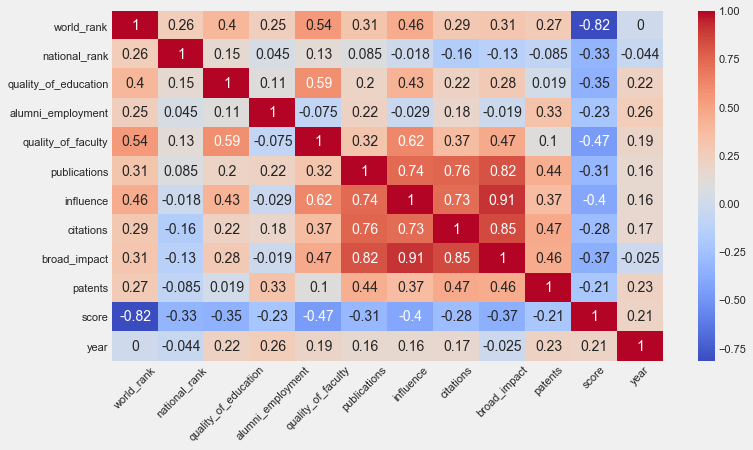

In [32]:
# Summary of overall correlation of dataframe for Top 100 universities from 2012-2015
fact_corr = df2_top100.corr

plt.subplots(figsize=(11,6))
sns.heatmap(fact_corr(),cmap='coolwarm',annot= True)
plt.xticks(rotation=45);

### Comments:

Factors most closely correlated to world rank are, in order of most correlated to least: quality of faculty (0.54), influence (0.46), and quality of education (0.4).

Factors least closely correlated to world rank, in order of least correlated to most: alumni employment(0.25), national rank (0.26), and patents (0.27). 


Highest correlations between factors themselves are between broad impact/influence(0.91), and broad impact/citations (0.85), showing a correlation at 0.92, very close to a direct correlation of 1. However, this could be due to the missing broad impact values for years 2012 & 2013, and should therefore not be counted. 

Little extra: The next highest correlations between factors (without broad impact) are between publications/citations (0.76), as well as publications/influence (0.74).

### Further notes:

As score is not a ranked metric, the lower the correlation portrayed, the higher the correlation actually is. Therefore, the factor that score is most correlated to is the quality of faculty, and the least correlated factor is patents. 

In [33]:
fact2012_corr = top100_2012.corr(method ='pearson')
df_wc2012 = pd.DataFrame(fact2012_corr.iloc[:, 0])
df_wc2012.drop(['broad_impact', 'year', 'world_rank'], axis=0, inplace = True)
# df_wc2012

In [34]:
fact2013_corr = top100_2013.corr(method ='pearson')
df_wc2013 = pd.DataFrame(fact2013_corr.iloc[:, 0])
df_wc2013.drop(['broad_impact', 'year', 'world_rank'], axis=0, inplace = True)
# df_wc2013

In [35]:
fact2014_corr = top100_2014.corr(method ='pearson')
df_wc2014 = pd.DataFrame(fact2014_corr.iloc[:, 0])
df_wc2014.drop(['broad_impact', 'year', 'world_rank'], axis=0, inplace = True)
# df_wc2014

In [36]:
fact2015_corr = top100_2015.corr(method ='pearson')
df_wc2015 = pd.DataFrame(fact2015_corr.iloc[:, 0])
df_wc2015.drop(['broad_impact', 'year', 'world_rank'], axis=0, inplace = True)
# df_wc2015

In [37]:
chart2 = {'year': [2012, 2013, 2014, 2015], 
             'quality_of_faculty': [0.769597, 0.752396, 0.522522, 0.485030], 
             'influence': [0.705230, 0.689526, 0.421450, 0.399998],
             'quality_of_education': [0.563944, 0.549999, 0.384644, 0.474167]}
df_chart2 = pd.DataFrame(data=chart2)
df_chart2.reset_index(drop=True, inplace=True)
df_chart2

,year,quality_of_faculty,influence,quality_of_education
0,2012,0.769597,0.705230,0.563944
1,2013,0.752396,0.689526,0.549999
2,2014,0.522522,0.421450,0.384644
3,2015,0.485030,0.399998,0.474167


In [38]:
trace11 = go.Scatter(x = df_chart2.year,
                    y = df_chart2.quality_of_faculty,
                    mode = "lines",
                    name = "Quality of Faculty",
                    marker = dict(color="#B41AF2"),
                    text = df_chart2.year)

trace12 = go.Scatter(x = df_chart2.year,
                    y = df_chart2.influence,
                    mode = "lines",
                    name = "Influence",
                    marker = dict(color="#1AF2C4"),
                    text = df_chart2.year)

trace13 = go.Scatter(x = df_chart2.year,
                    y = df_chart2.quality_of_education,
                    mode = "lines",
                    name = "Quality of Education",
                    marker = dict(color="#1A90F2"),
                    text = df_chart2.year)

# Plot line chart

data1 = [trace11, trace12, trace13]

layout1 = dict(title = 'Correlation of World Rank against Q. of Faculty, Influence, and Q. of Education (2012-2015)',
              xaxis = dict(tickformat = ',d', title = 'Year'),
              yaxis = dict(title = 'Co-relation'))

fig = dict(data=data1, layout=layout1)


offline.iplot(fig)

### Comments: 

All 3 factors show a heavy downward trend, suggesting that they have become less correlated to world ranks as time progressed. The heavy downturn comes after 2013, suggesting that CWUR might have adjusted the weightage for the three factors. This could also be compounded with the introduction of broad impact.

Influence was the most affected, decreasing around 50% in correlation between 2013-2015.

The only slight increase is the correlation for quality of education (2014-2015). While the correlation between world rank and quality of education has decreased from 2012-2015, it is the only correlation of a factor that has increased, and thus may be worth looking into to see if it continues on an upward trend in following years.

### Final Comments: 

!!! Very important to note certain inherent biases: 
    Data will always carry bias based on how they are obtained:  For Eg. studies that are in different languages or translated into English may not be ranked highly in citations/ publication as those in English. 
    Universities will have different focuses. Need to examine further on how measures are calculated to find a good fit for Charlie.
    
!!! Other factor to consider: 
    Price point: Universities in the USA are highly ranked, but notoriously expensive. Unless Charlie gets a scholarship, she might not be able to afford it.

Quality of Faculty, Influence, and Quality of Education all appear to have the highest overall coorelation to world rank. However, they seem to be dipping in importance during the course of 2012-2015. 

It might be worth looking for other factors such as broad impact to decide as preliminary findings suggest a high correlation to other factors like publication, citations, and influence. Need to determine if the correlation is due to causation.

Also, while the correlation between world rank and quality of education has decreased from 2012-2015, it is the only correlation of a factor that has increased, and thus may be worth looking into to see if it continues on an upward trend in following years.